In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [103]:
compas = pd.read_csv("compas-scores.csv")
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [104]:
colremove = [ 'name', 'first', 'last', 'compas_screening_date','dob','age_cat',
             'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas','r_case_number',
     'r_days_from_arrest', 'r_offense_date',
      'r_jail_in', 'r_jail_out','vr_case_number', 
       'vr_offense_date', 'screening_date',
      'v_screening_date',]

In [105]:
compas2 = compas.drop(colremove, axis =1)
compas2

,id,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,...,is_violent_recid,num_vr_cases,vr_charge_degree,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,type_of_assessment,decile_score.1,score_text
0,1,Male,69,Other,0,1,0,0,0,F,...,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,1,Low
1,2,Male,31,Caucasian,0,5,0,0,0,O,...,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,5,Medium
2,3,Male,34,African-American,0,3,0,0,0,F,...,1,NaN,(F3),Felony Battery (Dom Strang),Risk of Violence,1,Low,Risk of Recidivism,3,Low
3,4,Male,24,African-American,0,4,0,1,4,F,...,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
4,5,Male,23,African-American,0,8,1,0,1,F,...,0,NaN,NaN,NaN,Risk of Violence,6,Medium,Risk of Recidivism,8,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11753,Male,47,Other,0,3,0,0,1,F,...,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,3,Low
11753,11754,Male,22,Caucasian,0,7,3,5,3,M,...,0,NaN,NaN,NaN,Risk of Violence,5,Medium,Risk of Recidivism,7,Medium
11754,11755,Male,35,Other,0,4,0,0,0,M,...,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
11755,11756,Male,29,Caucasian,0,3,0,0,2,M,...,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,3,Low


In [106]:
compasdrug = compas2[compas2.c_charge_degree == "F"]
compasdrug.c_charge_desc.value_counts(True).head(10)

arrest case no charge             0.222115
Possession of Cocaine             0.096596
Grand Theft in the 3rd Degree     0.094243
Driving While License Revoked     0.035289
Felony Battery (Dom Strang)       0.022696
Felony Driving While Lic Suspd    0.022004
Grand Theft (Motor Vehicle)       0.018683
Pos Cannabis W/Intent Sel/Del     0.017852
Burglary Unoccupied Dwelling      0.017160
Burglary Conveyance Unoccup       0.017022
Name: c_charge_desc, dtype: float64

In [108]:
CompCocaine = compas2[compas2['c_charge_desc'].str.contains("Cocaine",na = False)]
CompCocaine = CompCocaine.rename(columns ={"sex":"Sex"})
CompCocaine = CompCocaine.rename(columns ={"race":"Race"})
CompCocaine.c_charge_desc.value_counts(True)

Possession of Cocaine                  0.872208
Deliver Cocaine                        0.047146
Poss Cocaine/Intent To Del/Sel         0.037221
Poss of Cocaine W/I/D/S 1000FT Park    0.007444
Traff In Cocaine <400g>150 Kil         0.006203
Solicit Deliver Cocaine                0.004963
Solicit To Deliver Cocaine             0.003722
Deliver Cocaine 1000FT School          0.002481
Poss/Sell/Del Cocaine 1000FT Sch       0.002481
Sale/Del Cocaine Child Care Fac        0.002481
Deliver Cocaine 1000FT Park            0.001241
Possession Of Cocaine                  0.001241
Trafficking In Cocaine 200-400         0.001241
Conspiracy to Deliver Cocaine          0.001241
Poss/Sel/Del Cocaine 1000FT Chur       0.001241
Poss/pur/sell/deliver Cocaine          0.001241
Deliver Cocaine 1000FT Church          0.001241
Purchase Of Cocaine                    0.001241
Deliver Cocaine 1000FT Store           0.001241
Sell Cocaine                           0.001241
Solicit Purchase Cocaine               0

In [109]:
CompCocaine2 = CompCocaine.groupby(["Race","Sex","score_text"]).count().reset_index()[["id","Race","score_text","Sex"]]
CompCocaine2                                   

,id,Race,score_text,Sex
0,26,African-American,High,Female
1,22,African-American,Low,Female
2,16,African-American,Medium,Female
3,183,African-American,High,Male
4,96,African-American,Low,Male
5,107,African-American,Medium,Male
6,1,Asian,Low,Female
7,1,Asian,Medium,Male
8,13,Caucasian,High,Female
9,38,Caucasian,Low,Female


In [110]:
CompCocaine3 = CompCocaine2[(CompCocaine2.Race == "African-American")| (CompCocaine2.Race == "Caucasian")]
CompCocaine3

,id,Race,score_text,Sex
0,26,African-American,High,Female
1,22,African-American,Low,Female
2,16,African-American,Medium,Female
3,183,African-American,High,Male
4,96,African-American,Low,Male
5,107,African-American,Medium,Male
8,13,Caucasian,High,Female
9,38,Caucasian,Low,Female
10,22,Caucasian,Medium,Female
11,32,Caucasian,High,Male


In [111]:
Compdum = pd.get_dummies(CompCocaine, prefix=["Race","Sex"], columns=["Race","Sex"])

In [112]:
Com2 = Compdum
Com2 = Com2.rename(columns ={"Race_African-American": "Race_African_American"})
Com2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc',
       'is_violent_recid', 'num_vr_cases', 'vr_charge_degree',
       'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text',
       'Race_African_American', 'Race_Asian', 'Race_Caucasian',
       'Race_Hispanic', 'Race_Native American', 'Race_Other', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [113]:
Com2 = [Com2[Com2.Sex_Female == 1].Race_African_American.sum(),
           Com2[Com2.Sex_Male == 1].Race_African_American.sum(),
           Com2[Com2.Sex_Female == 1].Race_Caucasian.sum(),
           Com2[Com2.Sex_Male == 1].Race_Caucasian.sum(),
          ]
Com2

[64, 386, 73, 215]

In [114]:
Com3 = np.repeat(Com2, 3)
Com3

array([ 64,  64,  64, 386, 386, 386,  73,  73,  73, 215, 215, 215])

In [115]:
rt = list(Com3)

In [116]:
CompCocaine3['totals'] = rt
CompCocaine3 = CompCocaine3.rename(columns = {"score_text":"Decile Score Category"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
CompCocaine3["% of Gender/Race Category"] = round(CompCocaine3["id"]/CompCocaine3["totals"]*100, 1)
COMPAS2 = CompCocaine3
COMPAS2

,id,Race,Decile Score Category,Sex,totals,% of Gender/Race Category
0,26,African-American,High,Female,64,40.6
1,22,African-American,Low,Female,64,34.4
2,16,African-American,Medium,Female,64,25.0
3,183,African-American,High,Male,386,47.4
4,96,African-American,Low,Male,386,24.9
5,107,African-American,Medium,Male,386,27.7
8,13,Caucasian,High,Female,73,17.8
9,38,Caucasian,Low,Female,73,52.1
10,22,Caucasian,Medium,Female,73,30.1
11,32,Caucasian,High,Male,215,14.9


In [172]:
COMPASPIVOT = COMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race',
)

COMPASPIVOT =COMPASPIVOT.reindex(["Low","Medium","High"])

In [173]:
r1 = COMPAS2[(COMPAS2.Race == "African-American")]
r3 = COMPAS2[(COMPAS2.Race == "Caucasian")]

m1 = COMPAS2[(COMPAS2.Sex == "Male")]
m2 = COMPAS2[(COMPAS2.Sex == "Female")]

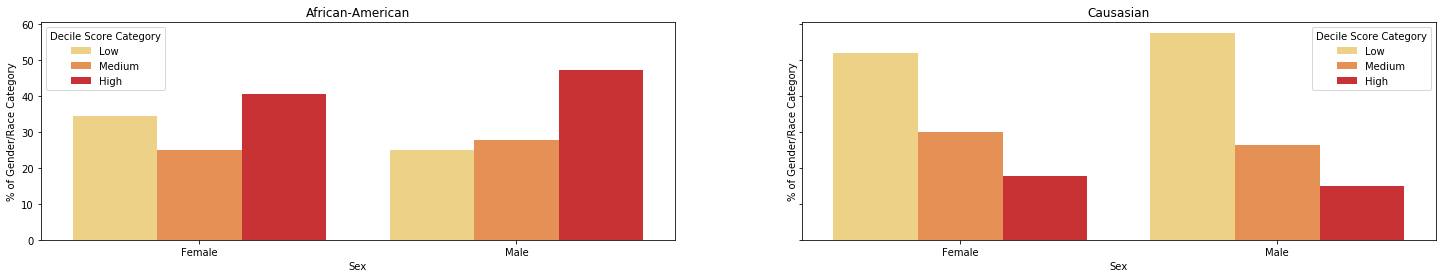

In [174]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

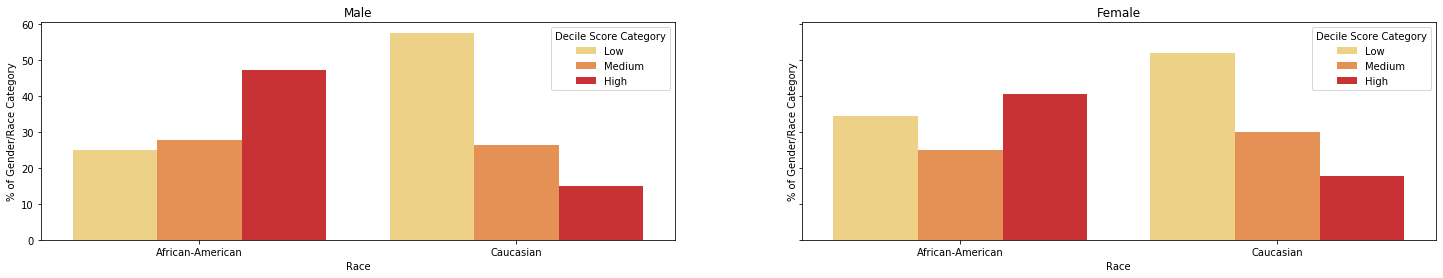

In [175]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m2, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Female")

Text(0.5, 1.0, 'Distribution of Decile Score for Cocaine-Related Offenses: Male Convicts')

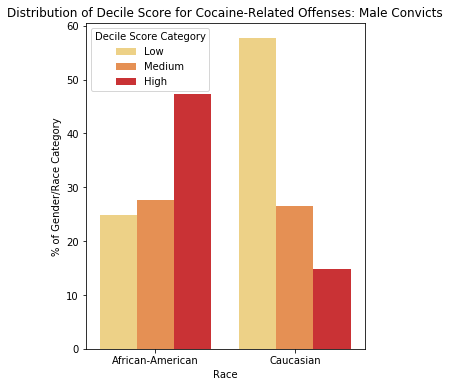

In [176]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 6
sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd").set_title("Distribution of Decile Score for Cocaine-Related Offenses: Male Convicts")

In [178]:
Malecocaine = m1.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race',
)

Malecocaine.reindex(["Low","Medium","High"])

Race,African-American,Caucasian
Decile Score Category,,
Low,24.9,57.7
Medium,27.7,26.5
High,47.4,14.9


In [149]:
VCompCocaine2 = CompCocaine.groupby(["Race","Sex","v_score_text"]).count().reset_index()[["id","Race","v_score_text","Sex"]]
VCompCocaine2                                   

,id,Race,v_score_text,Sex
0,7,African-American,High,Female
1,49,African-American,Low,Female
2,8,African-American,Medium,Female
3,61,African-American,High,Male
4,213,African-American,Low,Male
5,112,African-American,Medium,Male
6,1,Asian,Low,Female
7,1,Asian,Low,Male
8,1,Caucasian,High,Female
9,62,Caucasian,Low,Female


In [150]:
VCompCocaine3 = VCompCocaine2[(VCompCocaine2.Race == "African-American")| (VCompCocaine2.Race == "Caucasian")]
VCompCocaine3

,id,Race,v_score_text,Sex
0,7,African-American,High,Female
1,49,African-American,Low,Female
2,8,African-American,Medium,Female
3,61,African-American,High,Male
4,213,African-American,Low,Male
5,112,African-American,Medium,Male
8,1,Caucasian,High,Female
9,62,Caucasian,Low,Female
10,10,Caucasian,Medium,Female
11,9,Caucasian,High,Male


In [151]:
VCompdum = pd.get_dummies(CompCocaine, prefix=["Race","Sex"], columns=["Race","Sex"])

In [152]:
VCom2 = VCompdum
VCom2 = VCom2.rename(columns ={"Race_African-American": "Race_African_American"})
VCom2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc',
       'is_violent_recid', 'num_vr_cases', 'vr_charge_degree',
       'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text',
       'Race_African_American', 'Race_Asian', 'Race_Caucasian',
       'Race_Hispanic', 'Race_Native American', 'Race_Other', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [153]:
VCom2 = [VCom2[VCom2.Sex_Female == 1].Race_African_American.sum(),
           VCom2[VCom2.Sex_Male == 1].Race_African_American.sum(),
           VCom2[VCom2.Sex_Female == 1].Race_Caucasian.sum(),
           VCom2[VCom2.Sex_Male == 1].Race_Caucasian.sum(),
          ]
VCom2

[64, 386, 73, 215]

In [154]:
VCom3 = np.repeat(VCom2, 3)
rt = list(VCom3)

In [155]:
VCompCocaine3['totals'] = rt
VCompCocaine3 = VCompCocaine3.rename(columns = {"v_score_text":"Violent Decile Score Category"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
VCompCocaine3["% of Gender/Race Category"] = round(VCompCocaine3["id"]/VCompCocaine3["totals"]*100, 1)
VCOMPAS2 = VCompCocaine3
VCOMPAS2 =  VCOMPAS2.set_index("Violent Decile Score Category").reset_index()

In [157]:
VCOMPASPIVOT = VCOMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index = 'Race', 
    columns = 'Violent Decile Score Category'
)
VCOMPASPIVOT

Violent Decile Score Category,High,Low,Medium
Race,,,
African-American,13.35,65.9,20.75
Caucasian,2.80,82.0,15.20


In [158]:
r1 = VCOMPAS2[(VCOMPAS2.Race == "African-American")]
r3 = VCOMPAS2[(VCOMPAS2.Race == "Caucasian")]

m1 = VCOMPAS2[(VCOMPAS2.Sex == "Male")]
m2 = VCOMPAS2[(VCOMPAS2.Sex == "Female")]

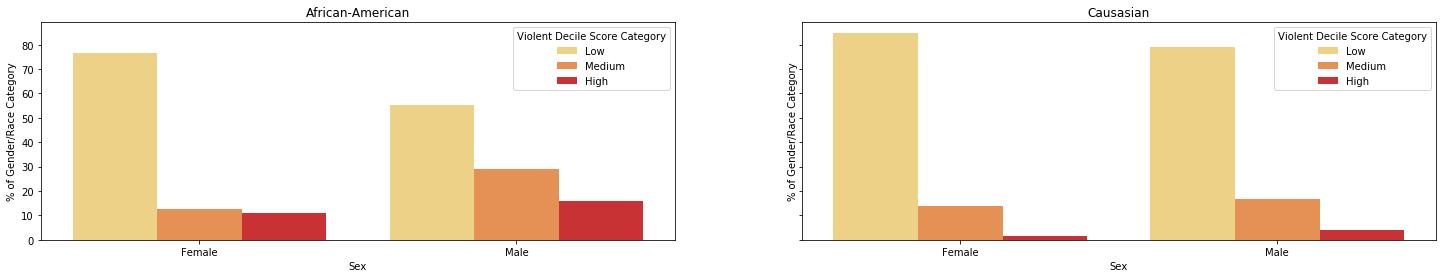

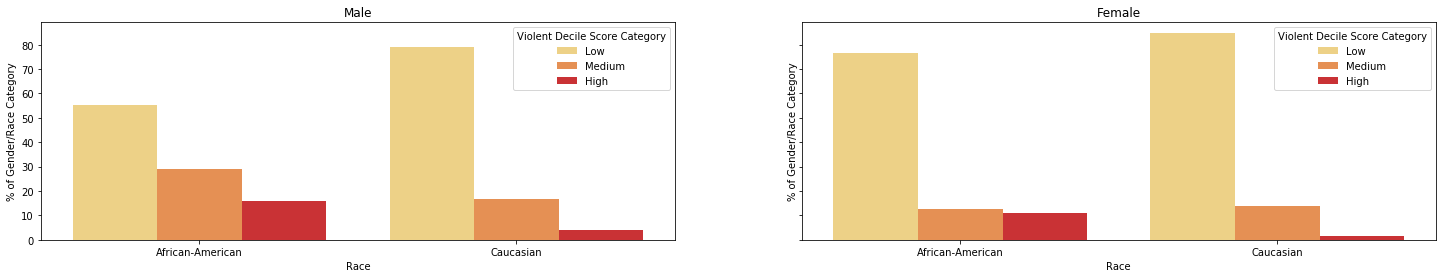

In [159]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m2, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[1])).set_title("Female")

Text(0.5, 1.0, 'Distribution of Violent Decile Score for Cocaine-Related Offenses: Male Convicts')

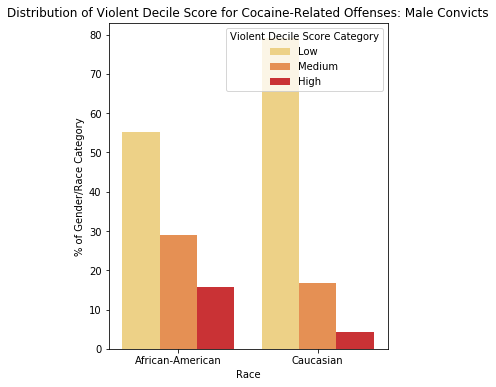

In [160]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 6
sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Violent Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd").set_title("Distribution of Violent Decile Score for Cocaine-Related Offenses: Male Convicts")

In [161]:
import pandas as pd

data = {'spike-2': [1,2,3], 'hey spke': [4,5,6], 'spiked-in': [7,8,9], 'no': [10,11,12]}
df = pd.DataFrame(data)
df

,spike-2,hey spke,spiked-in,no
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [162]:
spike_cols = [col for col in df.columns if 'spike' in col]
print(list(df.columns))
print(spike_cols)

['spike-2', 'hey spke', 'spiked-in', 'no']
['spike-2', 'spiked-in']
